# 後期前半の課題

## 提出について

- 第9回 "**12/3(火)**" の講義終了時、TeamsのAssignmentから提出してください。
- 提出範囲は、第1回~第9回とします。
- 提出はこのNotebook(.ipynbファイル)で、まとめてお願いします。
- コードを記述するだけではなく、セルを実行してください。
- 部分点を付けるので、完答していなくても出来たところまで回答してください。

## 第1回

### 問1

`scipy.stats`から確率分布(1次元)をひとつ選びなさい。そして、いくつかの異なるパラメータを使って、その確率分布をプロットしなさい。

確率分布の例:
- 一様分布 → 簡単すぎるので、今回はなし。
- ベルヌーイ分布 Bernoulli / 1回のコイン投げ
- 幾何分布 geometric
- 二項分布 binomial / 複数回のコイン投げ
- ポアソン分布 poisson / 地震が起きる間隔
- 正規分布 normal
- 指数分布 exponential / 地震の起きる回数
- ベータ分布 beta
- t分布
- F分布
- べき分布 power law

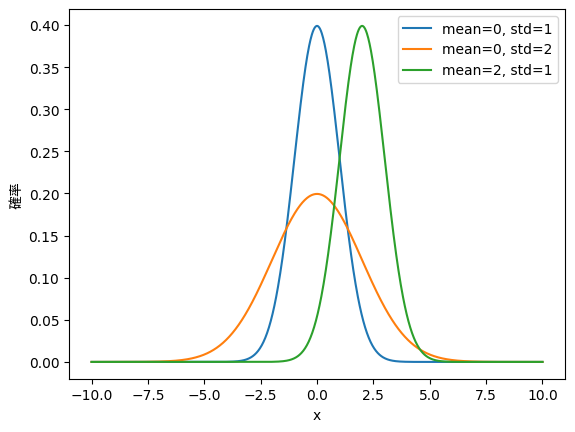

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)

# 平均0, 標準偏差1の正規分布
rv1 = stats.norm(loc=0, scale=1)
plt.plot(x, rv1.pdf(x), label="mean=0, std=1")

# 平均0, 標準偏差2の正規分布
rv2 = stats.norm(loc=0, scale=2)
plt.plot(x, rv2.pdf(x), label="mean=0, std=2")

# 平均2, 標準偏差1の正規分布
rv3 = stats.norm(loc=2, scale=1)
plt.plot(x, rv3.pdf(x), label="mean=2, std=1")

plt.legend()
plt.xlabel("x")
plt.ylabel("確率", fontname="MS Gothic")
plt.show()

### 問2

あるパラメータに対して、選んだ確率分布からサンプリングを行い、そのヒストグラムを元の確率分布と一緒にプロットしなさい。

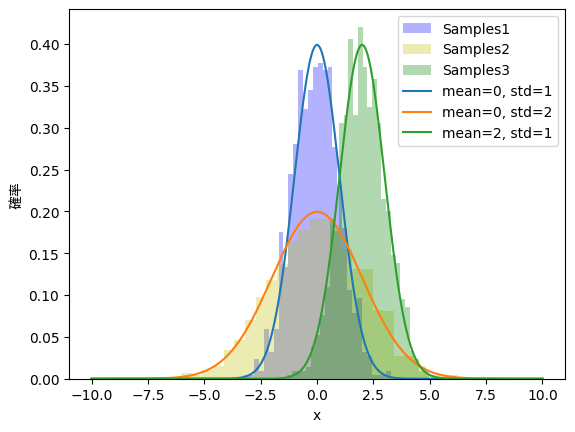

In [ ]:
samples1 = rv1.rvs(size=1000)
samples2 = rv2.rvs(size=1000)
samples3 = rv3.rvs(size=1000)

plt.hist(samples1, bins=30, density=True, alpha=0.3, color='b', label='Samples1')
plt.hist(samples2, bins=30, density=True, alpha=0.3, color='y', label='Samples2')
plt.hist(samples3, bins=30, density=True, alpha=0.3, color='g', label='Samples3')

plt.plot(x, rv1.pdf(x), label="mean=0, std=1")
plt.plot(x, rv2.pdf(x), label="mean=0, std=2")
plt.plot(x, rv3.pdf(x), label="mean=2, std=1")

plt.legend()
plt.xlabel("x")
plt.ylabel("確率", fontname="MS Gothic")
plt.show()

### 問3

選んだ確率分布から $n$ 個のサンプルを抽出し、標本平均 $\mu_n$ を求め、横軸 $n$ , 縦軸 $\mu_n$ でプロットしなさい。

### 問4

選んだ確率分布から $100$ 個のサンプルを抽出し、標本平均 $\mu_n$ を求める。それを $n = 1000$ 回行い、得られた標本平均についてのヒストグラムをプロットしなさい。また、選んだ確率分布の平均を $\mu$ , 分散を $\sigma^2$ として、平均 $\mu$ , 分散 $\frac{\sigma^2}{n}$ の正規分布を、先程のヒストグラムと一緒にプロットしなさい。

## 第2回

### 問1

`gymnasium`からEnvironmentsを一つ選んで、ひとつのエピソードを実行しなさい。特に学習を行う必要はない。

In [ ]:
import gymnasium as gym

# 環境の生成
env = gym.make("Blackjack-v1")

# エピソードのリセット
obs = env.reset()

done = False
# エピソードの実行
while not done:
    action = env.action_space.sample()  # 行動をランダムに選択
    obs, reward, done, _, _ = env.step(action)  # 行動を実行
    print("obs:", obs, "reward:", reward, "done:", done)    # 状態、報酬、終了フラグの出力

# 環境の破棄
env.close()

obs: (17, 3, 0) reward: 0.0 done: False
obs: (27, 3, 0) reward: -1.0 done: True


### 問2

次のうち、どちらか答えなさい。両方、答えても良い。
- `gymnasium`でオリジナルのEnvironmentを自作しなさい。次の[チュートリアル](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/#sphx-glr-tutorials-gymnasium-basics-environment-creation-py)を参考にしてもよい。
- `gymnasium`のチュートリアルから、興味のあるページをまとめたり試しなさい。

## 第3回

### 問1

`ai-programming-assignment-18.ipynb`のQ学習を確認しなさい。

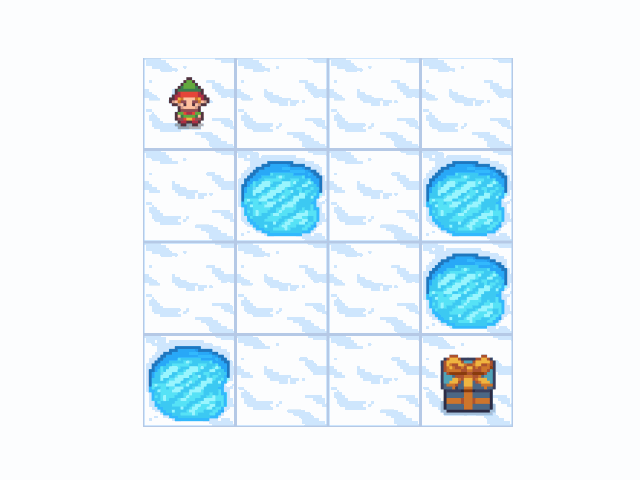

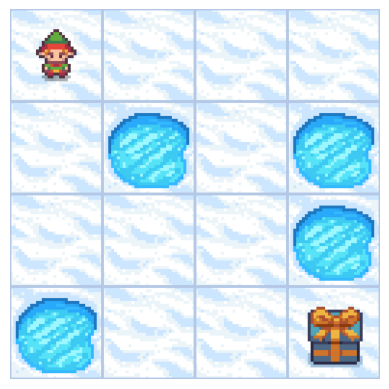

In [ ]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, Image

# frozen lakeの環境を生成
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode='rgb_array')

# Qテーブルの初期化
q_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1 # 学習率
gamma = 0.99 # 割引率
epsilon = 0.1 # ε-greedy法のε
episodes = 10000 # エピソード数
max_steps = 100 # 1エピソードの最大ステップ数

# ε-greedy法により行動を選択
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Q学習
for episode in range(episodes):
    state, _ = env.reset()

    for step in range(max_steps):
        action = choose_action(state, epsilon)

        next_state, reward, done, _, _ = env.step(action)

        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state

        if done:
            break

# エージェントの振る舞いを可視化
frames = []
def generate_frames():
    state, _ = env.reset()
    frames.append(env.render())
    done = False

    for step in range(max_steps):
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)

        frames.append(env.render())

        state = next_state

        if done:
            break

generate_frames()

fig = plt.figure()
plt.axis('off')

def update_frame(i):
    plt.imshow(frames[i])

anim = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=200)
anim.save("frozenlake_animation.gif", writer="pillow", fps=5)

with open("frozenlake_animation.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

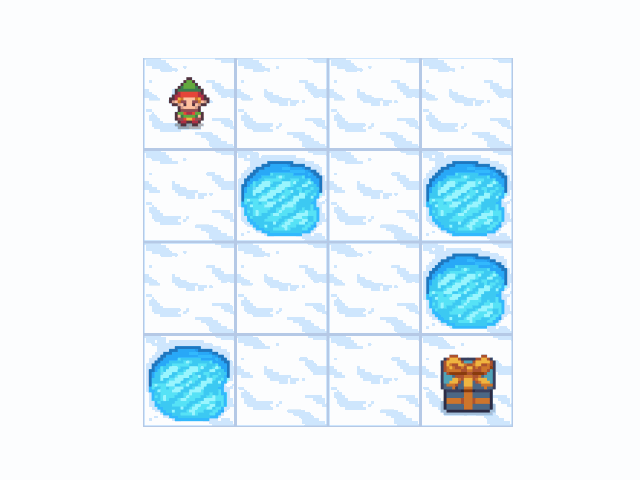

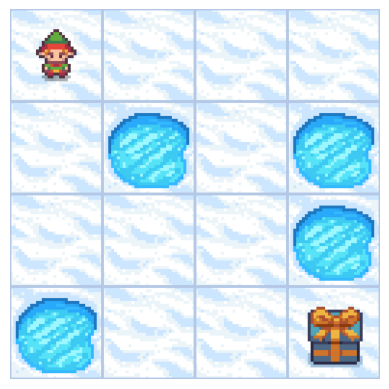

In [ ]:
# frozen lakeの環境を生成
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode='rgb_array')

# Qテーブルの初期化
q_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1 # 学習率
gamma = 0.99 # 割引率
epsilon = 1.0 # ε-greedy法のε
epsilon_decay = 0.995 # εの減衰率
min_epsilon = 0.01 # εの最小値
episodes = 10000 # エピソード数
max_steps = 500 # 1エピソードの最大ステップ数

# ε-greedy法により行動を選択
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Q学習
for episode in range(episodes):
    state, _ = env.reset()

    for step in range(max_steps):
        action = choose_action(state, epsilon)

        next_state, reward, done, _, _ = env.step(action)

        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state

        if done:
            break

    # εを減衰させる
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# エージェントの振る舞いを可視化
frames = []
def generate_frames():
    state, _ = env.reset()
    frames.append(env.render())
    done = False

    for step in range(max_steps):
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)

        frames.append(env.render())

        state = next_state

        if done:
            break

generate_frames()
fig = plt.figure()
plt.axis('off')
def update_frame(i):
    plt.imshow(frames[i])
anim = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=200)
anim.save("frozenlake_animation.gif", writer="pillow", fps=5)
with open("frozenlake_animation.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

### 問2

gymnasiumを使って、`ai-programming-assignment-18.ipynb`とは別の強化学習を実装しなさい。

例) Q学習を変更 / Environmentを変更 / パラメータを変更 ...

In [ ]:
import gymnasium as gym
import numpy as np
import random

import matplotlib.pyplot as plt

# CarRacing environment
env = gym.make("CarRacing-v3")

# Q-table initialization
state_space = (96, 96, 3)  # CarRacing has a 96x96 RGB image as state
action_space = env.action_space  # Number of discrete actions
q_table = np.zeros(state_space + (action_space,))

alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Epsilon for epsilon-greedy policy
epsilon_decay = 0.995  # Epsilon decay rate
min_epsilon = 0.01  # Minimum epsilon
episodes = 1000  # Number of episodes
max_steps = 1000  # Max steps per episode

# Function to choose action using epsilon-greedy policy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Q-learning algorithm
for episode in range(episodes):
    state, _ = env.reset()
    state = tuple(state.flatten())  # Flatten the state for indexing the Q-table

    for step in range(max_steps):
        action = choose_action(state, epsilon)

        next_state, reward, done, _, _ = env.step(action)
        next_state = tuple(next_state.flatten())  # Flatten the next state

        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state

        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# Visualize the agent's behavior
frames = []
def generate_frames():
    state, _ = env.reset()
    frames.append(env.render())
    done = False

    for step in range(max_steps):
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)

        frames.append(env.render())

        state = next_state

        if done:
            break

generate_frames()

fig = plt.figure()
plt.axis('off')

def update_frame(i):
    plt.imshow(frames[i])

anim = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=50)
anim.save("carracing_animation.gif", writer="pillow", fps=20)

with open("carracing_animation.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

TypeError: 'Box' object cannot be interpreted as an integer

## 第4回

### 問1

Hugging Faceのモデル`huawei-noah/TinyBERT_General_4L_312D`で、「king」, 「man」, 「woman」をどのようにベクトルとして表されているか、確認しなさい。そして、「king - man - woman」から得られるベクトルに、近い単語を答えなさい。


下記のnotebookを参考にしなさい。

In [ ]:
import torch


print(torch.version.cuda)
print(torch.cuda.is_available())

None
False


In [ ]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPUを使用します")
else:
    device = torch.device("cpu")
    print("CPUを使用します")

CPUを使用します


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel # type: ignore
from sklearn.metrics.pairwise import cosine_similarity

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "huawei-noah/TinyBERT_General_4L_312D"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)


def get_embedding(words):
    batch_inputs = tokenizer(
        words, return_tensors="pt", padding=True, truncation=True
    ).to(device)
    with torch.no_grad():
        outputs = model(**batch_inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding


king = get_embedding("king")
man = get_embedding("man")
woman = get_embedding("woman")
result_vector = king - man + woman

all_tokens = list(tokenizer.get_vocab().keys())
batch_size = 64
max_similarity = -1
most_similar_token = None


for i in range(0, len(all_tokens), batch_size):
    batch_tokens = all_tokens[i : i + batch_size]
    batch_embeddings = get_embedding(batch_tokens)

    similarities = cosine_similarity(
        result_vector.detach().cpu().numpy(), batch_embeddings.detach().cpu().numpy()
    )[0]

    max_index = similarities.argmax()
    if similarities[max_index] > max_similarity:
        max_similarity = similarities[max_index]
        most_similar_token = batch_tokens[max_index]

f:\deep-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
f:\deep-learning\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
most_similar_token

'queen'

### 問2

問1のようなの単語(文)の足し算・引き算を、他の例で試してください。

## 第5回

### 問

次に与えられるコードは、文章の2値分類モデルの学習である。コードを理解なさい。そして、適当な文章を訓練したモデルに入力して、出力を得なさい。

In [ ]:
!pip install datasets==2.21.0
!pip install fugashi==1.3.3
!pip install unidic-lite==1.0.8

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.6.1 which is incompatible.
   ━━━━━━━━━

In [ ]:
import os
import random
import numpy as np
import torch
import datasets
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainerCallback,
    TrainingArguments,
    DataCollatorWithPadding,
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Disable wandb to prevent it from asking for an API key
os.environ["WANDB_DISABLED"] = "true"


# Set random seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


set_seed(42)

# Load JGLUE MARC-ja dataset
train_dataset = datasets.load_dataset("shunk031/JGLUE", name="MARC-ja", split="train[:1%]", trust_remote_code=True)
valid_dataset = datasets.load_dataset("shunk031/JGLUE", name="MARC-ja", split="validation[:1%]", trust_remote_code=True)

# Model and tokenizer setup
MODEL_NAME = "cl-tohoku/bert-base-japanese-v3"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)


# Tokenization function
def tokenize_function(example):
    return tokenizer(example["sentence"], truncation=True, max_length=512)


# Apply tokenization to datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_valid_dataset = valid_dataset.map(tokenize_function, batched=True)

# Initialize model for sequence classification
num_labels = len(train_dataset.features["label"].names)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=num_labels
)

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Function to compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="weighted"
    )
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Make save strategy match evaluation strategy
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_strategy="epoch",
    load_best_model_at_end=True,
)

class CustomTrainer(Trainer):
    def _save(self, output_dir: str, state_dict=None):
        for name, param in self.model.named_parameters():
            if not param.is_contiguous():
                param.data = param.data.contiguous()
        super()._save(output_dir, state_dict)

# Initialize Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_valid_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/1875 [00:00<?, ? examples/s]

Map:   0%|          | 0/57 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.320500,0.503313,0.877193,0.859095,0.894049,0.877193
2,0.152900,0.579520,0.859649,0.834308,0.881242,0.859649
3,0.054400,0.484610,0.912281,0.904196,0.921232,0.912281


{'eval_loss': 0.4846096932888031, 'eval_accuracy': 0.9122807017543859, 'eval_f1': 0.9041959738054816, 'eval_precision': 0.9212316505549588, 'eval_recall': 0.9122807017543859, 'eval_runtime': 0.957, 'eval_samples_per_second': 59.56, 'eval_steps_per_second': 8.359, 'epoch': 3.0}


## 第6回

下記で与えるコード例を参考に、`nn.transformer`の仕組みを調査してください。



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Sample data (e.g., a simple string "hello world")
text = "hello fukuoka hello pytorch transformer example"
chars = sorted(list(set(text)))
vocab_size = len(chars)

# Create character-to-index and index-to-character mappings
char2idx = {ch: i for i, ch in enumerate(chars)}
idx2char = {i: ch for i, ch in enumerate(chars)}

# Encode the data into numbers (indices of characters)
data = [char2idx[ch] for ch in text]
sequence_length = 5
input_sequences = []
target_sequences = []

# Create input sequences and target sequences
for i in range(len(data) - sequence_length):
    input_sequences.append(data[i : i + sequence_length])
    target_sequences.append(data[i + sequence_length])

# Convert to PyTorch Tensors
input_sequences = torch.tensor(input_sequences)
target_sequences = torch.tensor(target_sequences)


# Define the Transformer model
class TransformerModel(nn.Module):
    def __init__(
        self, vocab_size, emb_size=64, nhead=2, num_layers=2, dim_feedforward=128
    ):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pos_encoder = nn.Parameter(
            torch.rand(sequence_length, emb_size)
        )  # Positional encoding
        self.transformer = nn.Transformer(
            d_model=emb_size,
            nhead=nhead,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
            dim_feedforward=dim_feedforward,
        )
        self.fc = nn.Linear(emb_size, vocab_size)

    def forward(self, src):
        embedded = self.embedding(src) + self.pos_encoder
        transformer_out = self.transformer(embedded, embedded)
        output = self.fc(transformer_out)
        return output


# Initialize the model, loss function, and optimizer
model = TransformerModel(vocab_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training function
def train_model(model, input_sequences, target_sequences, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for i in range(input_sequences.size(0)):
            src = input_sequences[i].unsqueeze(0)  # (1, sequence_length)
            target = target_sequences[i]  # (1,)

            optimizer.zero_grad()
            output = model(src).squeeze(0)  # (sequence_length, vocab_size)
            loss = criterion(
                output[-1], target
            )  # Compute loss for the last output token

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(
            f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / input_sequences.size(0):.4f}"
        )


# Train the model
train_model(model, input_sequences, target_sequences)


# Prediction function to generate text
def predict(model, start_text="hello"):
    model.eval()
    input_sequence = torch.tensor([char2idx[ch] for ch in start_text])
    for _ in range(20):  # Generate 20 characters
        with torch.no_grad():
            src = input_sequence[-sequence_length:].unsqueeze(0)  # (1, sequence_length)
            output = model(src)
            next_char = torch.argmax(
                output[0, -1]
            ).item()  # Get the predicted next character
            input_sequence = torch.cat((input_sequence, torch.tensor([next_char])))

    # Convert the input sequence to text using idx2char
    predicted_text = "".join(
        [idx2char[idx.item()] for idx in input_sequence]
    )  # Convert tensor to integer
    print("Generated text:", predicted_text)


# Display the generated text
predict(model)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/10], Loss: 3.1369
Epoch [2/10], Loss: 2.6206
Epoch [3/10], Loss: 2.3751
Epoch [4/10], Loss: 2.0075
Epoch [5/10], Loss: 1.8758
Epoch [6/10], Loss: 1.8637
Epoch [7/10], Loss: 1.7444
Epoch [8/10], Loss: 1.6111
Epoch [9/10], Loss: 1.6721
Epoch [10/10], Loss: 1.4798
Generated text: hellor tor tor tor tor to


## 第7回

`torchvision`を使って、モデルを読み込み推論しなさい。下記に`ResNet50`のコード例があるので、それとは別のモデルやweightで行いなさい。

【参考】  
- https://pytorch.org/vision/main/models.html

In [ ]:
from torchvision.io import decode_image
import torchvision
import requests
from torchvision.models import (
    resnet50,
    ResNet50_Weights,
    get_model_weights,
    list_models,
)

url = "https://www.nipponviolin.com/common/images/instrument/violin/visual_pc.jpg"
response = requests.get(url)

with open("visual_pc.jpg", "wb") as f:
    f.write(response.content)

img = decode_image("visual_pc.jpg")
print(torchvision.transforms.functional.to_pil_image(img))

print(list_models())

print(get_model_weights("resnet50"))

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

preprocess = weights.transforms()
img_transformed = preprocess(img)
batch = preprocess(img).unsqueeze(0)

prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(category_name, score)